In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../data/investments_VC.csv', encoding='latin1')


In [4]:
print("Shape of the dataset:", df.shape)

Shape of the dataset: (54294, 39)


In [13]:
df.head()


,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
print("Status:", df['status'].nunique())
print("City:", df['city'].nunique())
print("Category List:", df['category_list'].nunique())
print("Market:", df[' market '].nunique())

Status: 3
City: 4188
Category List: 16675
Market: 753


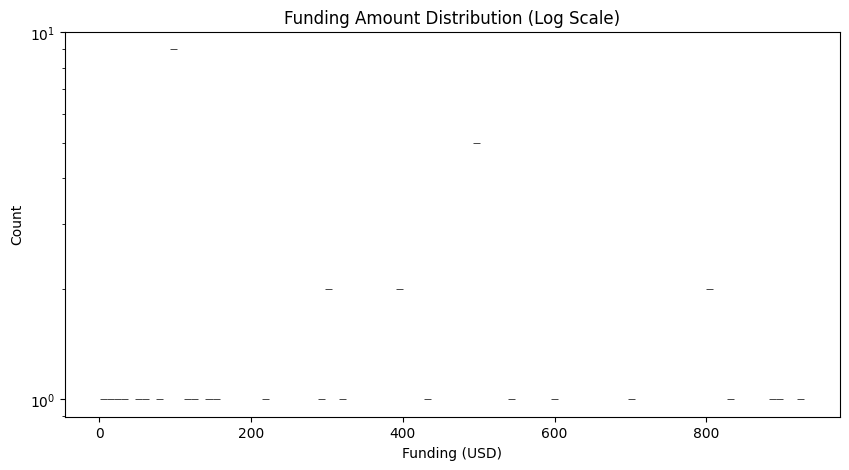

In [9]:
df[' funding_total_usd '] = pd.to_numeric(df[' funding_total_usd '], errors='coerce')
plt.figure(figsize=(10, 5))
sns.histplot(df[' funding_total_usd '], bins=100, log_scale=(False, True))
plt.title('Funding Amount Distribution (Log Scale)')
plt.xlabel('Funding (USD)')
plt.ylabel('Count')
plt.show()

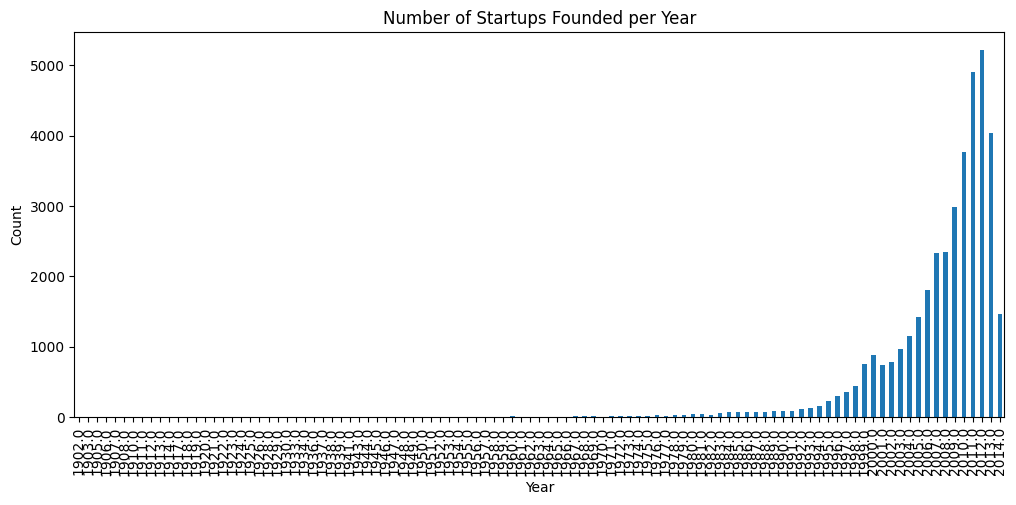

In [10]:
df['founded_year'] = pd.to_numeric(df['founded_year'], errors='coerce')
yearly = df['founded_year'].value_counts().sort_index()
plt.figure(figsize=(12, 5))
yearly.plot(kind='bar')
plt.title('Number of Startups Founded per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   permalink             49438 non-null  object 
 1   name                  49437 non-null  object 
 2   homepage_url          45989 non-null  object 
 3   category_list         45477 non-null  object 
 4    market               45470 non-null  object 
 5    funding_total_usd    49438 non-null  object 
 6   status                48124 non-null  object 
 7   country_code          44165 non-null  object 
 8   state_code            30161 non-null  object 
 9   region                44165 non-null  object 
 10  city                  43322 non-null  object 
 11  funding_rounds        49438 non-null  float64
 12  founded_at            38554 non-null  object 
 13  founded_month         38482 non-null  object 
 14  founded_quarter       38482 non-null  object 
 15  founded_year       

In [11]:
df.describe()

,funding_total_usd,funding_rounds,founded_year,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
count,42.000000,49438.000000,38482.000000,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,...,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04
mean,329.309524,1.696205,2007.359129,2.173215e+05,7.501051e+06,6.163322e+03,1.302213e+05,2.336410e+04,1.888157e+06,6.541898e+04,...,3.845592e+04,7.074227e+03,1.243955e+06,1.492891e+06,1.205356e+06,7.375261e+05,3.424682e+05,1.697692e+05,5.767067e+04,1.423197e+04
std,286.158023,1.294213,7.579203,1.056985e+06,2.847112e+07,1.999048e+05,2.981404e+06,1.432046e+06,1.382046e+08,6.582908e+05,...,3.864461e+06,4.282166e+05,5.531974e+06,7.472704e+06,7.993592e+06,9.815218e+06,5.406915e+06,6.277905e+06,5.252312e+06,2.716865e+06
min,1.000000,1.000000,1902.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,100.000000,1.000000,2006.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,253.000000,1.000000,2010.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,500.000000,2.000000,2012.000000,2.500000e+04,5.000000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,929.000000,18.000000,2014.000000,1.300000e+08,2.351000e+09,2.500000e+07,2.924328e+08,3.000000e+08,3.007950e+10,6.359026e+07,...,6.806116e+08,7.200000e+07,3.190000e+08,5.420000e+08,4.900000e+08,1.200000e+09,4.000000e+08,1.060000e+09,1.000000e+09,6.000000e+08


In [15]:
df.isnull().sum()

permalink                4856
name                     4857
homepage_url             8305
category_list            8817
 market                  8824
 funding_total_usd       4856
status                   6170
country_code            10129
state_code              24133
region                  10129
city                    10972
funding_rounds           4856
founded_at              15740
founded_month           15812
founded_quarter         15812
founded_year            15812
first_funding_at         4856
last_funding_at          4856
seed                     4856
venture                  4856
equity_crowdfunding      4856
undisclosed              4856
convertible_note         4856
debt_financing           4856
angel                    4856
grant                    4856
private_equity           4856
post_ipo_equity          4856
post_ipo_debt            4856
secondary_market         4856
product_crowdfunding     4856
round_A                  4856
round_B                  4856
round_C   

In [23]:
df[' funding_total_usd ']

0         17,50,000 
1         40,00,000 
2            40,000 
3         15,00,000 
4            60,000 
            ...     
54289            NaN
54290            NaN
54291            NaN
54292            NaN
54293            NaN
Name:  funding_total_usd , Length: 54294, dtype: object

In [16]:
df = df.drop(columns=[
    'homepage_url', 'permalink', 'undisclosed',
    'secondary_market', 'product_crowdfunding'
], errors='ignore')

In [17]:
funding_cols = ['seed', 'venture', 'angel', 'convertible_note', 'debt_financing',
                'equity_crowdfunding', 'grant', 'private_equity', 'post_ipo_equity',
                'post_ipo_debt', 'round_A', 'round_B', 'round_C', 'round_D',
                'round_E', 'round_F', 'round_G', 'round_H']
df[funding_cols] = df[funding_cols].fillna(0)

In [24]:
df.dropna(subset=['name', ' funding_total_usd ', 'founded_year', 'status', 'category_list'], inplace=True)


In [25]:
date_cols = ['founded_at', 'first_funding_at', 'last_funding_at']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

In [ ]:
df.to_csv('../data/cleaned_startups.csv', index=False)

In [ ]:
df.head()

,name,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,...,post_ipo_equity,post_ipo_debt,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,#waywire,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,New York,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,'Rock' Your Paper,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,Tallinn,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,(In)Touch Network,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,London,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-R- Ranch and Mine,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,Fort Worth,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0-6.com,|Curated Web|,Curated Web,"20,00,000",operating,NaN,NaN,NaN,NaN,1.0,...,0.0,0.0,2000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35767 entries, 0 to 49437
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   name                 35767 non-null  object        
 1   category_list        35767 non-null  object        
 2    market              35762 non-null  object        
 3    funding_total_usd   35767 non-null  object        
 4   status               35767 non-null  object        
 5   country_code         33154 non-null  object        
 6   state_code           23241 non-null  object        
 7   region               33154 non-null  object        
 8   city                 32767 non-null  object        
 9   funding_rounds       35767 non-null  float64       
 10  founded_at           35767 non-null  datetime64[ns]
 11  founded_month        35767 non-null  object        
 12  founded_quarter      35767 non-null  object        
 13  founded_year         35767 non-null 

In [ ]:
df[' market ']

In [29]:
categorical_cols = ['country_code', 'state_code', 'region', 'city', ' market ']
df[categorical_cols] = df[categorical_cols].fillna("Unknown")

In [ ]:
import numpy as np

df[' funding_total_usd '] = (
    df[' funding_total_usd ']
    .astype(str)
    .str.strip()                             
    .str.replace(',', '', regex=False)       
    .replace({'-': np.nan, '': np.nan, ' - ': np.nan})
    .astype(float)
)


df['funding_rounds'] = df['funding_rounds'].fillna(0).astype(int)


In [34]:
df['category_list'] = df['category_list'].str.strip('|').str.replace('|', ', ').str.strip()


In [35]:
df.isnull().sum()


name                      0
category_list             0
 market                   0
 funding_total_usd        0
status                    0
country_code              0
state_code                0
region                    0
city                      0
funding_rounds            0
founded_at                0
founded_month             0
founded_quarter           0
founded_year              0
first_funding_at          6
last_funding_at           2
seed                      0
venture                   0
equity_crowdfunding       0
convertible_note          0
debt_financing            0
angel                     0
grant                     0
private_equity            0
post_ipo_equity           0
post_ipo_debt             0
round_A                   0
round_B                   0
round_C                   0
round_D                   0
round_E                   0
round_F                   0
round_G                   0
round_H                   0
funding_total_usd      5416
dtype: int64

In [36]:
df.to_csv('../data/cleaned_startups_v2.csv', index=False)
